In [35]:
# Imports
import glob
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [45]:
# Global Variables
data_path = '../data/raw/'
substrings_to_remove = [data_path.replace('raw/', 'raw'), '\\', 'RefBldg', '.csv']

# Functions
def get_building_type(filename):
    return re.sub(r'New2004.+', '', filename)

def get_location(filename):
    return re.sub(r'^.*USA_', '', filename)

def get_all_csv_filenames(path):
    return glob.glob(path + "*.csv")

def build_dataframe(filenames):
    building_energy_profiles_list = []
    for filepath in filenames:
        df = pd.read_csv(filepath)
        df['building_type'] = get_building_type(clean_filename(filepath))
        df['location'] = get_location(clean_filename(filepath))
        building_energy_profiles_list.append(df)
    df = pd.DataFrame()
    df = pd.concat(building_energy_profiles_list)
    df.reset_index(drop=True, inplace=True)
    return df

def clean_filename(filename):
    for substring_to_remove in substrings_to_remove:
        filename = filename.replace(substring_to_remove, '')
    return filename

def standardize_columns(columns):
    mapping = [ (' ', '_'), ('[', ''), (']\(', '_'), ('\)', '') , ('/', '_'), (':', '_')]
    for k, v in mapping:
        columns = columns.str.replace(k, v)
    return columns

In [10]:
df = build_dataframe(get_all_csv_filenames(data_path))
df.info() # Shows the rows count and the types
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280320 entries, 0 to 280319
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Date/Time                                   280320 non-null  object 
 1   Electricity:Facility [kW](Hourly)           280320 non-null  float64
 2   Fans:Electricity [kW](Hourly)               280320 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            280320 non-null  float64
 4   Heating:Electricity [kW](Hourly)            280320 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     280320 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  280320 non-null  float64
 7   Gas:Facility [kW](Hourly)                   280320 non-null  float64
 8   Heating:Gas [kW](Hourly)                    280320 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          157680 non-null  float64
 

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280316,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280317,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280318,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [11]:
for building_type in df.building_type.unique():
    print(building_type)

FullServiceRestaurant
Hospital
LargeHotel
LargeOffice
MediumOffice
MidriseApartment
OutPatient
PrimarySchool
QuickServiceRestaurant
SecondarySchool
SmallHotel
SmallOffice
Stand-aloneRetail
StripMall
SuperMarket
Warehouse


## EDA

In [24]:
# Both these columns have no data, so we drop them
cols_to_remove = ["Electricity:Facility [kW](Monthly)", "Gas:Facility [kW](Monthly)"]
df.drop(cols_to_remove, inplace=True, axis=1)

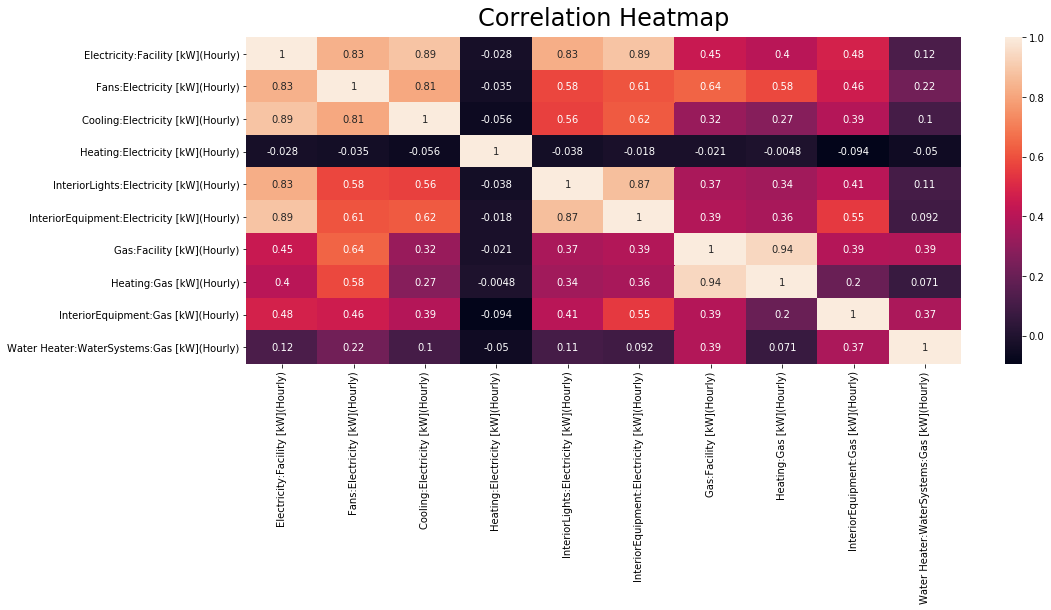

In [25]:
# Correlation Matrix
plt.figure(figsize=(16, 6))
corrMatrix = df.corr()
heatmap = sns.heatmap(corrMatrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);
plt.show()

## Correlation Matrix Insights
- There is weak correlation between Heating:Electricity \[kW](Hourly) and all other rows & columns. This probably means most of the buildings are using gas instead of electricity for heating.
- This is also evident in the correlation between Heating:Gas \[kW](Hourly) and Gas:Facility \[kW](Hourly). These columns show a high correlation of 0.94 which would also strongly suggest that gas is used for heating in most buildings in this dataset.
- Along the first column, Fans:Electricity \[kW](Hourly), Cooling:Electricity \[kW](Hourly), InteriorLights:Electricity \[kW](Hourly), InteriorEquipment:Electricity \[kW](Hourly) are all highly correlated to the Electricity:Facility \[kW](Hourly).


Because of the high correlation between the individual electricity columns, we decided its better to drop both the individual electric and gas columns and use the aggregate columns Electricity:Facility \[kW](Hourly) & Gas:Facility \[kW](Hourly)

In [31]:
cols_to_remove = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)','Heating:Electricity [kW](Hourly)'
                                              ,'InteriorLights:Electricity [kW](Hourly)','InteriorEquipment:Electricity [kW](Hourly)'
                                              ,'Heating:Gas [kW](Hourly)','InteriorEquipment:Gas [kW](Hourly)','Water Heater:WaterSystems:Gas [kW](Hourly)'
                                              ]
df.drop(cols_to_remove, inplace=True, axis=1)

In [33]:
df.head()

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),building_type,location
0,01/01 01:00:00,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA


In [41]:
df['building_type'] = LabelEncoder().fit_transform(df['building_type'].values)
df['location']= LabelEncoder().fit_transform(df['location'].values) 
df.head()

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),building_type,location
0,01/01 01:00:00,22.545838,61.536209,0,0
1,01/01 02:00:00,14.745113,3.359880,0,0
2,01/01 03:00:00,14.760728,3.931953,0,0
3,01/01 04:00:00,14.766270,3.359880,0,0
4,01/01 05:00:00,14.918930,3.931959,0,0


In [44]:
df.columns = standardize_columns(df.columns)
df

,Date_Time,Electricity_Facility_kW_Hourly,Gas_Facility_kW_Hourly,building_type,location
0,01/01 01:00:00,22.545838,61.536209,0,0
1,01/01 02:00:00,14.745113,3.359880,0,0
2,01/01 03:00:00,14.760728,3.931953,0,0
3,01/01 04:00:00,14.766270,3.359880,0,0
4,01/01 05:00:00,14.918930,3.931959,0,0
...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,60.633698,15,1
280316,12/31 21:00:00,19.655896,82.036381,15,1
280317,12/31 22:00:00,19.063661,70.727347,15,1
280318,12/31 23:00:00,20.442228,98.965980,15,1


A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below.

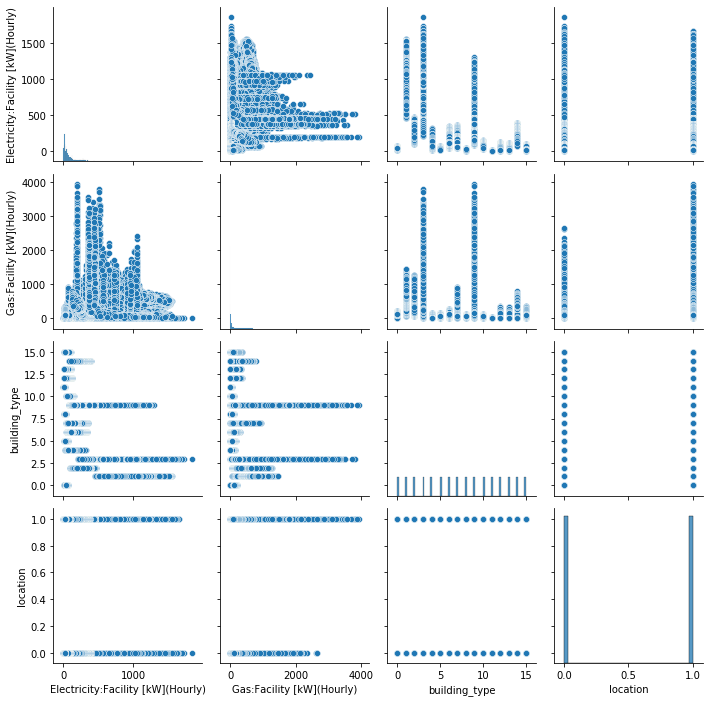

In [42]:
# Pairs Plot
sns.pairplot(df)
plt.show()

In [ ]:
# try separate pairs plot for aggregate cols and another for all other cols

In [28]:
# distribution chart for energy usage per building type
# avg load per hour per building type
df


,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280316,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280317,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280318,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE


DataError: No numeric types to aggregate

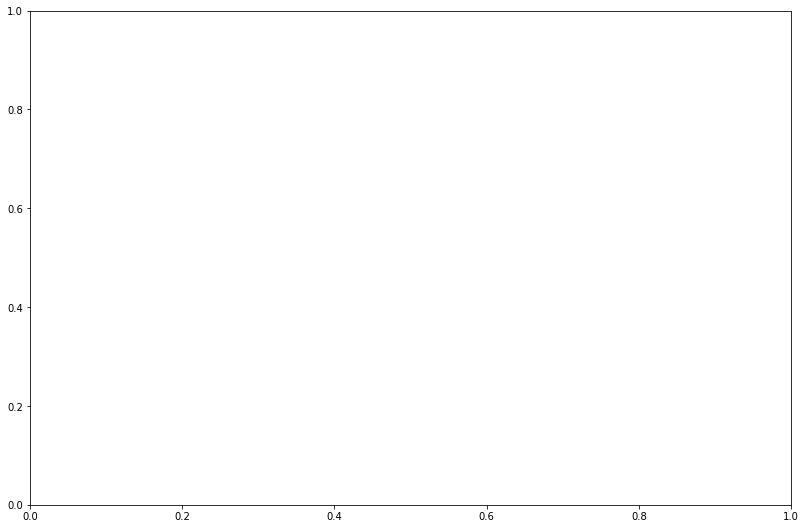

In [30]:
# Electricity usage by building type
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
df.groupby('building_type').building_type.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Electricity usage by building type')